# Projeto de Bloco: Inteligência Artificial e Machine Learning
## Teste de Performance - TP3

### Atividade 1
Criação das features:Aplicar Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos conjuntos de dados.

### Atividade 2
Modelo de ML:  Desenvolver e treinar modelos de árvores de decisão para tarefas de classificação.


### Atividade 3
Avaliação de Modelos: Aplicar técnicas de validação cruzada para estimar a eficiência dos modelos desenvolvidos.

### Atividade 4
Busca Hiperparamétrica: Utilizar GridSearch para otimizar os hiperparâmetros dos modelos.

### Atividade 5
Pruning de Árvores de Decisão: Realizar o pruning (poda) em árvores de decisão para prevenir o overfitting e melhorar a generalização do modelo.

### Atividade 6
Avaliação de Classificadores Binários: Utilizar figuras de mérito como Curva ROC, precisão, recall, f1-score, sensibilidade e especificidade para avaliar os modelos.

1 componentes: acurácia média = 0.531
2 componentes: acurácia média = 0.488
3 componentes: acurácia média = 0.624
4 componentes: acurácia média = 0.643
5 componentes: acurácia média = 0.613
6 componentes: acurácia média = 0.623
7 componentes: acurácia média = 0.638
8 componentes: acurácia média = 0.652
9 componentes: acurácia média = 0.632
10 componentes: acurácia média = 0.657
11 componentes: acurácia média = 0.696
12 componentes: acurácia média = 0.643
13 componentes: acurácia média = 0.658
14 componentes: acurácia média = 0.663
15 componentes: acurácia média = 0.663
16 componentes: acurácia média = 0.677
17 componentes: acurácia média = 0.658
18 componentes: acurácia média = 0.629
19 componentes: acurácia média = 0.668
20 componentes: acurácia média = 0.629
21 componentes: acurácia média = 0.648
22 componentes: acurácia média = 0.653
23 componentes: acurácia média = 0.648
24 componentes: acurácia média = 0.619
25 componentes: acurácia média = 0.609
26 componentes: acurácia média = 0

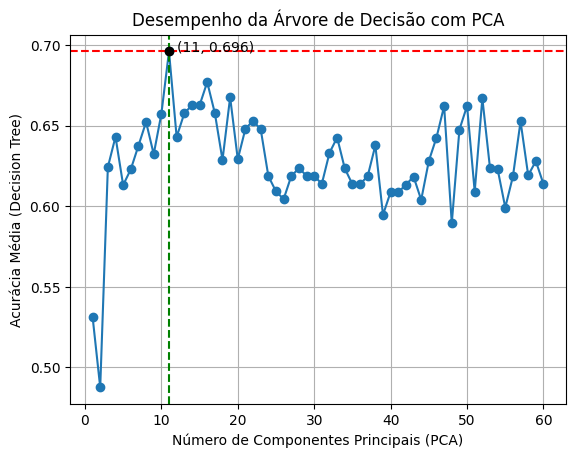


Melhores hiperparâmetros: {'criterion': 'gini'}
Melhor acurácia: 0.696
Profundidade máxima: 12

Melhores hiperparâmetros: {'criterion': 'gini', 'max_depth': 7}
Melhor acurácia: 0.711
Profundidade máxima: 7

Métrica         Profundidade=7 Profundidade=12
Acurácia             0.738      0.714
Precisão             0.682      0.667
Sensibilidade        0.789      0.737
F1-score             0.732      0.700
Curva roc            0.740      0.716
Especificidade       0.696      0.696


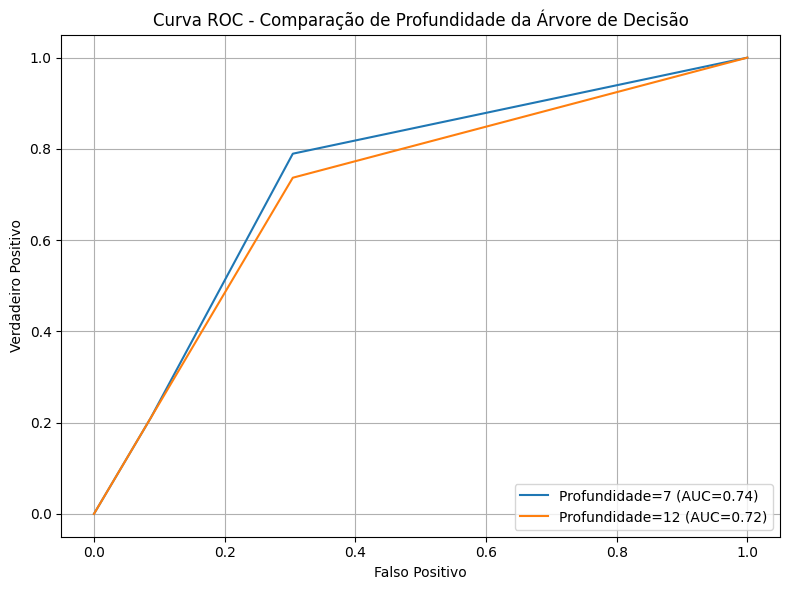

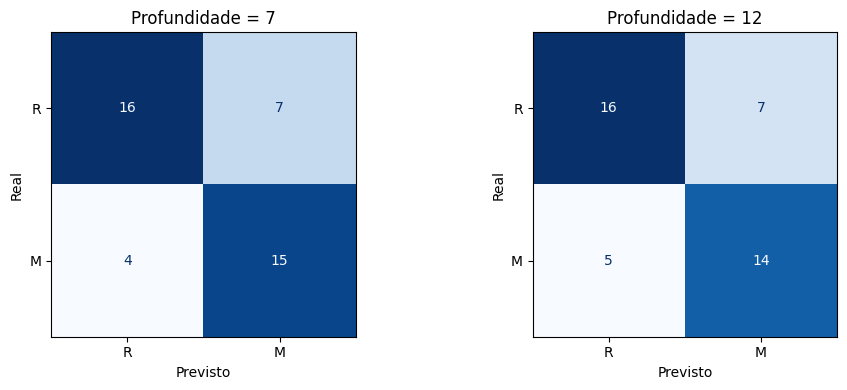

In [1]:
import pandas as pd
from sklearn import preprocessing, decomposition, model_selection, tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# ******************************************************************************
# ***                              ATIVIDADE 1                               ***
# ******************************************************************************

# Importar os dados
dataset = pd.read_csv("https://raw.githubusercontent.com/professortiagoinfnet/inteligencia_artificial/main/sonar_dataset.csv")

# Criar as features e o target
features = dataset.iloc[:, :-1] # todas as linhas e todas as colunas, exceto a última coluna
target = dataset.iloc[:, -1]    # todas as linhas e somente a última coluna 

# Normalizar os dados
scaler = preprocessing.StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicar PCA para diferentes dimensões
features_pcas = {}
for n in range(features.shape[1]+1):
    pca = decomposition.PCA(n_components=n)
    features_pca = pca.fit_transform(features_scaled)
    features_pcas[n] = features_pca


# ******************************************************************************
# ***                              ATIVIDADE 2                               ***
# ******************************************************************************

# Para garantir que o resultado seja reproduzível toda vez que o modelo for gerado,
#    foi definida uma constante para o random state
RANDOM_STATE = 11
decision_tree = tree.DecisionTreeClassifier(random_state=RANDOM_STATE)


# ******************************************************************************
# ***                              ATIVIDADE 3                               ***
# ******************************************************************************

# Calcular a acurácia para cada um dos conjuntos de dados gerados pelo PCA utilizando
#   validação cruzada
accuracy_pcas = {}
for n in range(1, features.shape[1]+1):
    results = model_selection.cross_val_score(decision_tree, features_pcas[n], target, cv=5)
    accuracy_pcas[n] = results.mean()
    print(f"{n} componentes: acurácia média = {results.mean():.3f}")

# Valor de n que resulta na maior acurácia dentre os conjuntos gerados pelo PCA
max_n = max(accuracy_pcas, key=accuracy_pcas.get)

# Melhor acurácia para o n encontrado
max_accuracy = accuracy_pcas[max_n]

# Gerar gráfico com as acurácias
plt.plot(list(accuracy_pcas.keys()), list(accuracy_pcas.values()), marker='o', label='Acurácia')
plt.axhline(y=max_accuracy, color='red', linestyle='--', label=f'Máxima Acurácia: {max_accuracy:.3f}')
plt.axvline(x=max_n, color='green', linestyle='--', label=f'Nº Componentes: {max_n}')
plt.scatter(max_n, max_accuracy, color='black', zorder=5)
plt.text(max_n + 1, max_accuracy, f"({max_n}, {max_accuracy:.3f})", color='black', fontsize=10)
plt.xlabel('Número de Componentes Principais (PCA)')
plt.ylabel('Acurácia Média (Decision Tree)')
plt.title('Desempenho da Árvore de Decisão com PCA')
plt.grid(True)
plt.show()

# Utilizando a Análise de Componentes Principais e validação cruzada, identificamos
#   que o uso de 11 componentes principais gera a melhor acurácia para o modelo de
#   árvode de decisão, considerando o estado aleatório 11.


# ******************************************************************************
# ***                              ATIVIDADE 4                               ***
# ******************************************************************************

# Features para o melhor valor de n = 11
feature_max = features_pcas[max_n]

# Realizar busca hiperparamétrica
param_grid = {'criterion': ['gini', 'entropy', 'log_loss']}
grid_search = model_selection.GridSearchCV(decision_tree, param_grid, cv=5)
grid_search.fit(feature_max, target)

# Mostrar resultados
print(f"\nMelhores hiperparâmetros: {grid_search.best_params_}")
print(f"Melhor acurácia: {grid_search.best_score_:.3f}")
print(f"Profundidade máxima: {grid_search.best_estimator_.tree_.max_depth}")

# Variando-se o hiperparâmetro criterion e utilizando o número de componentes 
#   principais que geraram a melhor acurácia, sem limitar a profundidade da
#   árvore de decisão, foi encontrado que o parâmetro 'gini' gera a melhor
#   acurácia para uma profundidade de 12 nós.


# ******************************************************************************
# ***                              ATIVIDADE 5                               ***
# ******************************************************************************

# Incluindo a profundidade da árvore de decisão como hiperparâmetro
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': list(range(2, 12))
}
grid_search = model_selection.GridSearchCV(decision_tree, param_grid, cv=5)
grid_search.fit(feature_max, target)

# Mostrar resultados com a poda da árvore
print(f"\nMelhores hiperparâmetros: {grid_search.best_params_}")
print(f"Melhor acurácia: {grid_search.best_score_:.3f}")
print(f"Profundidade máxima: {grid_search.best_estimator_.tree_.max_depth}")

# Limitando-se a profundidade da árvore de decisão, foi encontrado um valor de
#   profundidade de 7 nós que geram a melhor acurácia para o modelo.


# ******************************************************************************
# ***                              ATIVIDADE 6                               ***
# ******************************************************************************

# Codificar o target para gerar a matriz de confusão (R = 0, M = 1)
label = preprocessing.LabelEncoder()
target_bin = label.fit_transform(target)

# Dividir features com componentes principais que geraram os melhores resultados em
#   treinamento e teste
feature_train, feature_test, target_train, target_test = model_selection.train_test_split(
    feature_max, target_bin, test_size=0.2, random_state=RANDOM_STATE, stratify=target_bin
)

# Definir diferentes profundidades
depths = [7, 12]
results = {}

# Para cada uma das profundidades da árvore de decisão encontrada, foram calculadas as métricas
for d in depths:
    # Ambos os modelos usam o critério 'gini'
    model = tree.DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='gini', max_depth=d)
    model.fit(feature_train, target_train)
    
    # Gerar provisões do modelo
    target_pred = model.predict(feature_test)
    target_proba = model.predict_proba(feature_test)[:, 1]
    
    # Calcular métricas
    accuracy = accuracy_score(target_test, target_pred)
    precision = precision_score(target_test, target_pred)
    recall = recall_score(target_test, target_pred)
    f1 = f1_score(target_test, target_pred)
    roc_auc = roc_auc_score(target_test, target_proba)
    cm = confusion_matrix(target_test, target_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    fpr, tpr, _ = roc_curve(target_test, target_proba)

    # Resultados para o modelo (com profundidade d)
    results[d] = {
        'model': model,
        'acurácia': accuracy,
        'precisão': precision,
        'sensibilidade': recall,
        'f1-score': f1,
        'curva roc': roc_auc,
        'especificidade': specificity,
        'fpr': fpr,
        'tpr': tpr,
        'confusion_matrix': cm
    }

# Mostrar resultados lado a lado
print(f"\n{'Métrica':<15} {'Profundidade=7':>10} {'Profundidade=12':>10}")
for metric in ['acurácia', 'precisão', 'sensibilidade', 'f1-score', 'curva roc', 'especificidade']:
    print(f"{metric.capitalize():<15} {results[7][metric]:>10.3f} {results[12][metric]:>10.3f}")

# Gerar gráfico de ROC
plt.figure(figsize=(8, 6))
for d in depths:
    plt.plot(results[d]['fpr'], results[d]['tpr'], label=f'Profundidade={d} (AUC={results[d]["curva roc"]:.2f})')
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC - Comparação de Profundidade da Árvore de Decisão")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar matrizes de confusão lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for idx, d in enumerate(depths):
    disp = ConfusionMatrixDisplay(confusion_matrix=results[d]['confusion_matrix'], display_labels=["R", "M"])
    disp.plot(ax=axes[idx], cmap="Blues", colorbar=False)
    axes[idx].set_title(f"Profundidade = {d}")
    axes[idx].set_xlabel("Previsto")
    axes[idx].set_ylabel("Real")
    axes[idx].grid(False)
plt.tight_layout()
plt.show()
